In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
%load_ext autoreload
%autoreload 2
%run '../main.py'

In [3]:
dataSetOps = DataSetOps()

dataSetOps.import_years(2015, 2017)

dataSetOps.prepare()


df = dataSetOps.df

In [4]:
# variables
mavgl = 30
window = 20
epilson = 0.0001

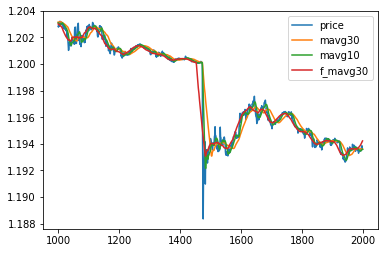

In [5]:
mavgl = str(mavgl)
df['f_mavg' + mavgl] = df['mavg' + mavgl].shift(-window)
df['f_price'] = df['price'].shift(-window)
df['value'] = df['f_mavg' + mavgl] - df['mavg' + mavgl] > epilson
df['value_real'] = df['f_price'] - df['price'] > epilson
df[['price', 'mavg' + mavgl, 'mavg10', 'f_mavg' + mavgl]].head(1000).plot()

0.37416160026104467


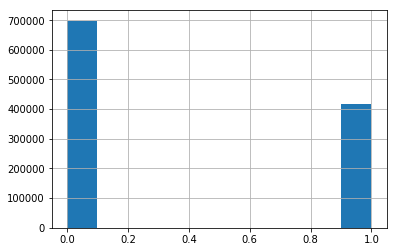

In [6]:
df['value'].astype(int).hist()
print(len(df[df['value']]) / (len(df)))

In [7]:
X = df[['price', 'mavg10', 'mavg20', 'mavg50', 'mavg80', 'mavg100', 'mavg1000']]
Y = df['value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

    
#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 7))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling Neural Network
from keras import metrics
metric_names = [metrics.mae, 'accuracy']
classifier.compile(optimizer='adam', loss = 'mean_squared_error', metrics=metric_names)

# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 20, epochs = 700)
import random
classifier.save("/tmp/mavg_classifier_" + str(random.randint(100000, 999999)))

Using TensorFlow backend.
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=16, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  del sys.path[0]
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Epoch 1/700
1003966/1003966 [==============================] - 21s 21us/step - loss: 0.1950 - mean_absolute_error: 0.3902 - acc: 0.7050
Epoch 2/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1677 - mean_absolute_error: 0.3331 - acc: 0.7563
Epoch 3/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1576 - mean_absolute_error: 0.3121 - acc: 0.7731
Epoch 4/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1542 - mean_absolute_error: 0.3048 - acc: 0.7775
Epoch 5/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1520 - mean_absolute_error: 0.3001 - acc: 0.7811
Epoch 6/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1503 - mean_absolute_error: 0.2961 - acc: 0.7838
Epoch 7/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1496 - mean_absolute_error: 0.2944 - acc: 0.7848
Epoch 8/700
1003966/1003966 [===================

1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1404 - mean_absolute_error: 0.2756 - acc: 0.8007
Epoch 61/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1403 - mean_absolute_error: 0.2754 - acc: 0.8010
Epoch 62/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1403 - mean_absolute_error: 0.2754 - acc: 0.8010
Epoch 63/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1403 - mean_absolute_error: 0.2753 - acc: 0.8014
Epoch 64/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1402 - mean_absolute_error: 0.2750 - acc: 0.8011
Epoch 65/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1402 - mean_absolute_error: 0.2749 - acc: 0.8014
Epoch 66/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1400 - mean_absolute_error: 0.2749 - acc: 0.8014
Epoch 67/700
1003966/1003966 [========================

1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1385 - mean_absolute_error: 0.2718 - acc: 0.8038
Epoch 120/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1386 - mean_absolute_error: 0.2719 - acc: 0.8037
Epoch 121/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1384 - mean_absolute_error: 0.2715 - acc: 0.8040
Epoch 122/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1384 - mean_absolute_error: 0.2714 - acc: 0.8042
Epoch 123/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1384 - mean_absolute_error: 0.2716 - acc: 0.8042
Epoch 124/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1384 - mean_absolute_error: 0.2715 - acc: 0.8039
Epoch 125/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1383 - mean_absolute_error: 0.2715 - acc: 0.8041
Epoch 126/700
1003966/1003966 [=================

1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1371 - mean_absolute_error: 0.2725 - acc: 0.8057
Epoch 179/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1371 - mean_absolute_error: 0.2731 - acc: 0.8054
Epoch 180/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1369 - mean_absolute_error: 0.2731 - acc: 0.8056
Epoch 181/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1368 - mean_absolute_error: 0.2731 - acc: 0.8056
Epoch 182/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1368 - mean_absolute_error: 0.2732 - acc: 0.8052
Epoch 183/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1369 - mean_absolute_error: 0.2730 - acc: 0.8054
Epoch 184/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1368 - mean_absolute_error: 0.2730 - acc: 0.8052
Epoch 185/700
1003966/1003966 [=================

1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1362 - mean_absolute_error: 0.2718 - acc: 0.8064
Epoch 238/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1361 - mean_absolute_error: 0.2717 - acc: 0.8066
Epoch 239/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1362 - mean_absolute_error: 0.2718 - acc: 0.8063
Epoch 240/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1362 - mean_absolute_error: 0.2717 - acc: 0.8061
Epoch 241/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1363 - mean_absolute_error: 0.2719 - acc: 0.8063
Epoch 242/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1362 - mean_absolute_error: 0.2720 - acc: 0.8062
Epoch 243/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1361 - mean_absolute_error: 0.2718 - acc: 0.8065
Epoch 244/700
1003966/1003966 [=================

1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1359 - mean_absolute_error: 0.2712 - acc: 0.8069
Epoch 297/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1357 - mean_absolute_error: 0.2709 - acc: 0.8071
Epoch 298/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1359 - mean_absolute_error: 0.2711 - acc: 0.8069
Epoch 299/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1359 - mean_absolute_error: 0.2711 - acc: 0.8067
Epoch 300/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1358 - mean_absolute_error: 0.2710 - acc: 0.8068
Epoch 301/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1358 - mean_absolute_error: 0.2711 - acc: 0.8067
Epoch 302/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1358 - mean_absolute_error: 0.2710 - acc: 0.8070
Epoch 303/700
1003966/1003966 [=================

1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1356 - mean_absolute_error: 0.2707 - acc: 0.8072
Epoch 356/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1356 - mean_absolute_error: 0.2707 - acc: 0.8073
Epoch 357/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1355 - mean_absolute_error: 0.2705 - acc: 0.8074
Epoch 358/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1356 - mean_absolute_error: 0.2707 - acc: 0.8073
Epoch 359/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1356 - mean_absolute_error: 0.2708 - acc: 0.8076
Epoch 360/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1355 - mean_absolute_error: 0.2706 - acc: 0.8073
Epoch 361/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1356 - mean_absolute_error: 0.2709 - acc: 0.8072
Epoch 362/700
1003966/1003966 [=================

1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1354 - mean_absolute_error: 0.2705 - acc: 0.8077
Epoch 415/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1354 - mean_absolute_error: 0.2704 - acc: 0.8074
Epoch 416/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1353 - mean_absolute_error: 0.2703 - acc: 0.8078
Epoch 417/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1353 - mean_absolute_error: 0.2701 - acc: 0.8077
Epoch 418/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1352 - mean_absolute_error: 0.2700 - acc: 0.8077
Epoch 419/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1353 - mean_absolute_error: 0.2703 - acc: 0.8078
Epoch 420/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1354 - mean_absolute_error: 0.2705 - acc: 0.8078
Epoch 421/700
1003966/1003966 [=================

1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1352 - mean_absolute_error: 0.2699 - acc: 0.8079
Epoch 474/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1352 - mean_absolute_error: 0.2701 - acc: 0.8077
Epoch 475/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1352 - mean_absolute_error: 0.2697 - acc: 0.8077
Epoch 476/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1351 - mean_absolute_error: 0.2699 - acc: 0.8079
Epoch 477/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1351 - mean_absolute_error: 0.2697 - acc: 0.8078
Epoch 478/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1351 - mean_absolute_error: 0.2697 - acc: 0.8078
Epoch 479/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1351 - mean_absolute_error: 0.2696 - acc: 0.8079
Epoch 480/700
1003966/1003966 [=================

1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1350 - mean_absolute_error: 0.2695 - acc: 0.8081
Epoch 533/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1350 - mean_absolute_error: 0.2697 - acc: 0.8082
Epoch 534/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1350 - mean_absolute_error: 0.2695 - acc: 0.8082
Epoch 535/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1351 - mean_absolute_error: 0.2697 - acc: 0.8082
Epoch 536/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1350 - mean_absolute_error: 0.2697 - acc: 0.8080
Epoch 537/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1349 - mean_absolute_error: 0.2694 - acc: 0.8082
Epoch 538/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1351 - mean_absolute_error: 0.2696 - acc: 0.8083
Epoch 539/700
1003966/1003966 [=================

1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1349 - mean_absolute_error: 0.2693 - acc: 0.8084
Epoch 592/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1348 - mean_absolute_error: 0.2689 - acc: 0.8084
Epoch 593/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1349 - mean_absolute_error: 0.2691 - acc: 0.8085
Epoch 594/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1349 - mean_absolute_error: 0.2692 - acc: 0.8086
Epoch 595/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1348 - mean_absolute_error: 0.2687 - acc: 0.8087
Epoch 596/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1349 - mean_absolute_error: 0.2690 - acc: 0.8085
Epoch 597/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1348 - mean_absolute_error: 0.2690 - acc: 0.8084
Epoch 598/700
1003966/1003966 [=================

1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1347 - mean_absolute_error: 0.2688 - acc: 0.8086
Epoch 651/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1348 - mean_absolute_error: 0.2688 - acc: 0.8085
Epoch 652/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1348 - mean_absolute_error: 0.2688 - acc: 0.8086
Epoch 653/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1347 - mean_absolute_error: 0.2686 - acc: 0.8089
Epoch 654/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1348 - mean_absolute_error: 0.2688 - acc: 0.8085
Epoch 655/700
1003966/1003966 [==============================] - 20s 20us/step - loss: 0.1347 - mean_absolute_error: 0.2688 - acc: 0.8088
Epoch 656/700
1003966/1003966 [==============================] - 20s 19us/step - loss: 0.1348 - mean_absolute_error: 0.2688 - acc: 0.8085
Epoch 657/700
1003966/1003966 [=================

In [9]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
from lib.helper import AccuracyCalculator

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, (y_pred > 0.8))

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(y_pred[:,0], y_test, 100)
risk_hist_df = AccuracyCalculator.risk_hist(y_pred[:,0], y_test)


class_accuracy => accuracy:  0.6779386542435614 risk:  0.09159167765231845
optimistic_accuracy => risk:  0.01 min pass point:  0.96709824


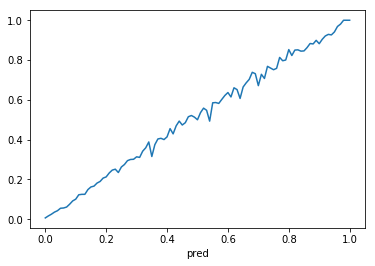

In [10]:
(1-risk_hist_df.risk).plot()

In [11]:
cm

array([[68114,  1598],
       [25991, 15849]])

In [12]:
dfx = df[df['value']]
p_f = len(dfx[dfx['value_real']]) / len(dfx)
p_r = cm[1,1] / (cm[1,1] + cm[0,1])
print('real prob', p_f , p_r, p_f * p_r)

real prob 0.5964603338891764 0.9084083223476815 0.5418295312552047
